# Overall analysis and implementation plan - By Ankit Pathak

- ID - Drop - All values unique
- User_ID - Drop - PII - mobile number - we do not use Personal Information Identifiers in machine learning features
- vehicle_model_id - transform into is_VMID_12 for if the vehicle model id was 12 or not, since >70% of values are 12

- Divide the data into 3 datasets based on travel_type_id, since for different travel types different features are applicable

- After dividing the data into 3 subsets, 3 different machine learning models are to be created:
1. ML Model 1 for travel_type_1
2. ML Model 2 for travel type_2
3. ML Model 3 for travel_type_3

# Below is the column-wise analysis for each subset regarding if they need to be dropped, kept or transformed.

## For travel_type_id = 1

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - use mode to impute the null values
- to_city_id - use mode to impute the null values
- Make a column for inter-city routes - from_city_id -> to_city_id
- city_routes - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- to_city_id, from_city_id, routes, cancellation_perc - drop
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id

## For travel_type_id = 2

- package_id - drop - all null values
- travel_type_id - d0rop - all same values
- from_area_id,to_area_id - Make a column for intra-city routes - from_area_id -> to_area_id - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- from_lat,from_long,to_lat,to_long - impute missing using median
- from these lat/long - calculate the distance in KM (geopy) and then drop all four lat/long col

## For travel_type_id = 3

- package_id - keep
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## Preprocess these subsets if required such as label encoding etc.


## Machine Learning - Classification
- Decision Tree
- Random Forest
- Naive Bayes Classifier

### Compare the performance and then select the BEST model for each of the three datasets


# Load the dataset

In [1]:
# import libraries
import pandas as pd

In [2]:
df = pd.read_csv('YourCabs.csv')

In [3]:
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## id, user_id

In [ ]:
df.id.nunique()  # All the values are unique - drop this col - no pattern/repetition available

43431

In [ ]:
df.user_id.nunique()  # Because it is a PII(Personal Information Identifier) - we drop it

22267

In [ ]:
df = df.drop(['id','user_id'],axis=1)
df.head()

,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## vehicle_model_id 

In [8]:
df.vehicle_model_id.nunique()

27

In [9]:
df.vehicle_model_id.value_counts()

vehicle_model_id
12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

In [10]:
31859/43431  # more than 70% data has the same value

0.7335543736041077

In [11]:
pd.get_dummies(df.vehicle_model_id.astype('object'))[12].astype('int')

0        0
1        1
2        1
3        1
4        1
        ..
43426    1
43427    1
43428    1
43429    0
43430    1
Name: 12, Length: 43431, dtype: int32

In [12]:
df['is_VMID_12'] = pd.get_dummies(df.vehicle_model_id.astype('object'))[12].astype('int')
df = df.drop(['vehicle_model_id'],axis=1)
df.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


# Divide the dataset into 3 parts baseed on the travel_type_id

In [13]:
df_ttid_1 = df.loc[df.travel_type_id == 1]
df_ttid_1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
6,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,1
17,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,0
24,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,0
158,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,0
216,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,0


In [14]:
df_ttid_2 = df.loc[df.travel_type_id == 2]
df_ttid_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [15]:
df_ttid_3 = df.loc[df.travel_type_id == 3]
df_ttid_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


## Preprocessing data where travel_type_id == 1

In [16]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
 15  is_VMID_12           1589 non-null   int32

In [17]:
df_ttid_1 = df_ttid_1.drop(['travel_type_id','package_id','to_area_id','from_lat','from_long','to_lat','to_long'],axis=1)
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0


## Missing Value Treatment

In [18]:
df_ttid_1.isnull().sum()  # missing values

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
is_VMID_12               0
dtype: int64

In [19]:
# Converting the IDs into categorical data type
df_ttid_1.from_area_id = df_ttid_1.from_area_id.astype('object')
df_ttid_1.from_city_id = df_ttid_1.from_city_id.astype('object')
df_ttid_1.to_city_id = df_ttid_1.to_city_id.astype('object')

df_ttid_1.from_date = pd.to_datetime(df_ttid_1.from_date,format='mixed')
df_ttid_1.booking_created = pd.to_datetime(df_ttid_1.booking_created,format='mixed')

df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
 8   is_VMID_12           1589 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(3)
memory usage: 117.9+ KB


In [20]:
df_ttid_1.describe(include=['object'])

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [21]:
df_ttid_1.from_area_id = df_ttid_1.from_area_id.fillna('393')
df_ttid_1.from_city_id = df_ttid_1.from_city_id.fillna('15')
df_ttid_1.to_city_id = df_ttid_1.to_city_id.fillna('32')
df_ttid_1.isnull().sum()

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

## from_area_id

In [22]:
# Calculating the cancellation perc for each area
from_area_id_cancelation_perc = df_ttid_1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
df_ttid_1['from_area_id_cancelation_perc'] = df_ttid_1.from_area_id.map(from_area_id_cancelation_perc)
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_perc
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408
17,1383.0,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000
216,1118.0,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000


In [23]:
import numpy as np

In [24]:
df_ttid_1['from_area_id_cancelation_volume'] = np.where(df_ttid_1.from_area_id_cancelation_perc >= 0.67, 'High',
                                                     np.where(df_ttid_1.from_area_id_cancelation_perc == 0.0, 'Zero',
                                                     np.where(df_ttid_1.from_area_id_cancelation_perc <= 0.34, 'Low',
                                                     'Medium'
                                                    )))
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_perc,from_area_id_cancelation_volume
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408,Low
17,1383.0,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000,Zero
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000,Zero
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000,Zero
216,1118.0,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000,Zero


In [25]:
df_ttid_1 = df_ttid_1.drop(['from_area_id_cancelation_perc','from_area_id'],axis=1)
df_ttid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low
17,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero
216,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero


## from_city_id, to_city_id

In [26]:
df_ttid_1.from_city_id = df_ttid_1.from_city_id.astype('int')
df_ttid_1.to_city_id = df_ttid_1.to_city_id.astype('int')
df_ttid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero


In [27]:
# Creating city routes
df_ttid_1['city_route'] = df_ttid_1.from_city_id.astype('str') + ' -> ' + df_ttid_1.to_city_id.astype('str')
df_ttid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,15 -> 108
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,15 -> 32
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,15 -> 32
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,1 -> 152
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,15 -> 32


In [28]:
city_route_cancelation_perc = df_ttid_1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
df_ttid_1['city_route_cancelation_perc'] = df_ttid_1.city_route.map(city_route_cancelation_perc)
df_ttid_1['city_route_cancelation_volume'] = np.where(df_ttid_1.city_route_cancelation_perc >= 0.67, 'High',
                                                     np.where(df_ttid_1.city_route_cancelation_perc == 0.0, 'Zero',
                                                     np.where(df_ttid_1.city_route_cancelation_perc <= 0.34, 'Low',
                                                     'Medium'
                                                    )))
df_ttid_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route,city_route_cancelation_perc,city_route_cancelation_volume
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,15 -> 108,0.016129,Low
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,15 -> 32,0.017937,Low
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,15 -> 32,0.017937,Low
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,1 -> 152,0.000000,Zero
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,15 -> 32,0.017937,Low


In [29]:
df_ttid_1 = df_ttid_1.drop(['from_city_id','to_city_id','city_route','city_route_cancelation_perc'],axis=1)
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low


# from_date, booking_created

In [30]:
df_ttid_1['month'] = df_ttid_1.from_date.dt.month
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1


In [31]:
df_ttid_1['day_of_week'] = df_ttid_1.from_date.dt.dayofweek  # Monday is 0 and Sunday is 6
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6


In [32]:
df_ttid_1['is_weekend'] = (df_ttid_1['day_of_week'] >=5).astype('int')
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1


In [33]:
df_ttid_1['hour_of_day'] = df_ttid_1.from_date.dt.hour 
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7


In [34]:
df_ttid_1['time_of_day'] = pd.cut(df_ttid_1['hour_of_day'], bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning


In [35]:
df_ttid_1['time_diff'] = (df_ttid_1.from_date - df_ttid_1.booking_created).dt.total_seconds()/3600
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning,45.966667


<Axes: >

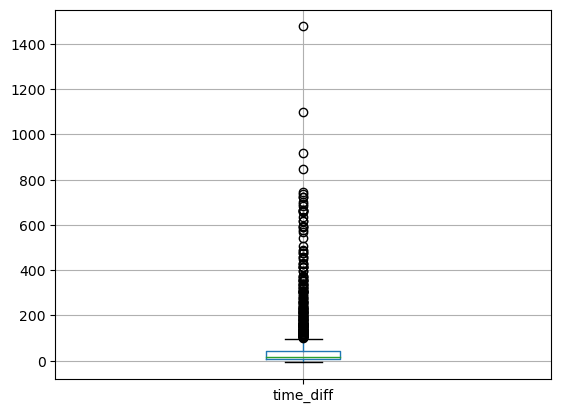

In [36]:
df_ttid_1.boxplot('time_diff')

In [37]:
Q1 = df_ttid_1['time_diff'].quantile(0.25)
Q3 = df_ttid_1['time_diff'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

outlier_count_ul = df_ttid_1[df_ttid_1['time_diff'] > UL].shape[0]
outlier_perc_ul = (outlier_count_ul * 100) / df_ttid_1.shape[0]

outlier_count_ll = df_ttid_1[df_ttid_1['time_diff'] < LL].shape[0]
outlier_perc_ll = (outlier_count_ll * 100) / df_ttid_1.shape[0]

print(f"# of Outliers on the Higher Side: {outlier_count_ul} | % of Outliers on the Higher Side: {outlier_perc_ul}%")
print(f"# of Outliers on the Lower Side: {outlier_count_ll} | % of Outliers on the Lower Side: {outlier_perc_ll}%")

# Since > 13% of the rows are outliers, we will create categories, rather than replacing with limits

Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | LL: -44.2 | UL: 97.8
# of Outliers on the Higher Side: 219 | % of Outliers on the Higher Side: 13.782252989301448%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


In [38]:
df_ttid_1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [39]:
df_ttid_1['booking_nature'] = pd.cut(df_ttid_1['time_diff'], bins=[-8,2,17,45,1500],labels=['Urgent','SameDay','Regular','Advance'])
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning,0.400000,Urgent
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning,259.716667,Advance
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning,89.833333,Advance
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning,21.183333,Regular
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning,45.966667,Advance


In [40]:
df_ttid_1 = df_ttid_1.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_ttid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,city_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
6,0,0,0,1,Low,Low,1,1,0,Morning,Urgent
17,1,0,0,0,Zero,Low,1,5,1,Morning,Advance
24,0,0,0,0,Zero,Low,1,5,1,Morning,Advance
158,1,0,0,0,Zero,Zero,1,4,0,Morning,Regular
216,1,0,0,0,Zero,Low,1,6,1,Morning,Advance


## Re-arranging the cols

In [41]:
df_ttid_1 = df_ttid_1[['from_area_id_cancelation_volume','city_route_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','mobile_site_booking','Car_Cancellation']]
df_ttid_1.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,0,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,1,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,1,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,0,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,1,6,1,0,1,0,0


In [42]:
df_ttid_1.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,0,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,1,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,1,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,0,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,1,6,1,0,1,0,0


# EDA

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

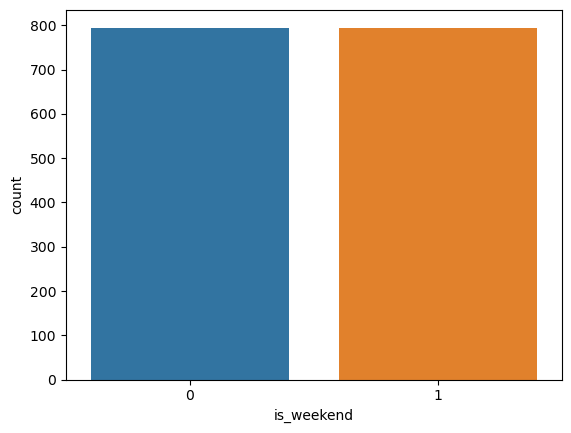

In [44]:
sns.countplot(x='is_weekend',data=df_ttid_1)  # booking volume on a weekday and weekend
plt.show()

# The booking volume is almost the same on weekdays and weekends

<Axes: xlabel='is_weekend', ylabel='count'>

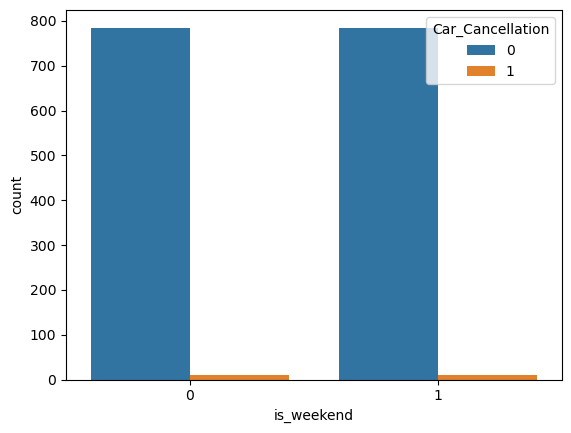

In [45]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_ttid_1)
# The Cancelation volume is almost the same on weekdays and weekends

In [46]:
# Drop the is_weekend col, because not much information provided for cancelation behaviour
df_ttid_1 = df_ttid_1.drop('is_weekend', axis=1)
df_ttid_1.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,6,1,0,1,0,0


<Axes: xlabel='day_of_week', ylabel='count'>

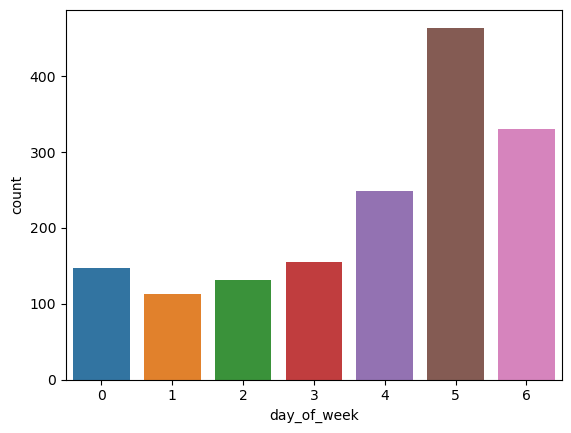

In [47]:
sns.countplot(x='day_of_week',data=df_ttid_1)  # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

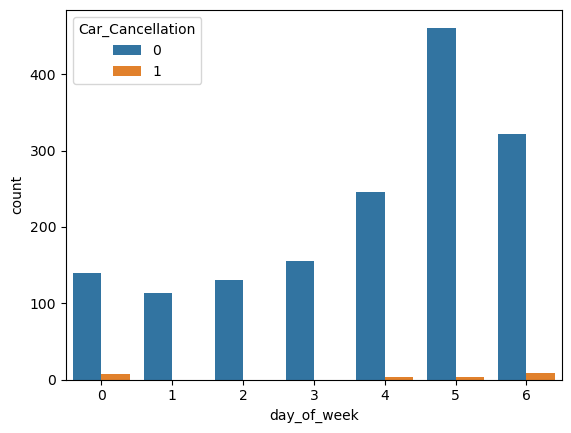

In [48]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_ttid_1) 

# Tue, Wed, Thur - no cancelations, but Fri, Sat, Sun, Mon - there are cancelations

<Axes: xlabel='day_of_week', ylabel='count'>

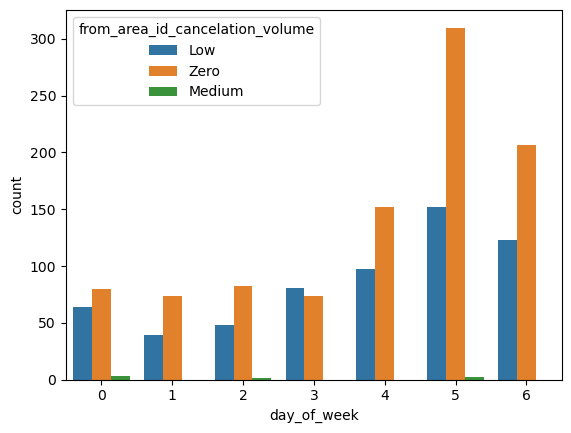

In [49]:
sns.countplot(x='day_of_week',hue='from_area_id_cancelation_volume',data=df_ttid_1)

<Axes: xlabel='day_of_week', ylabel='count'>

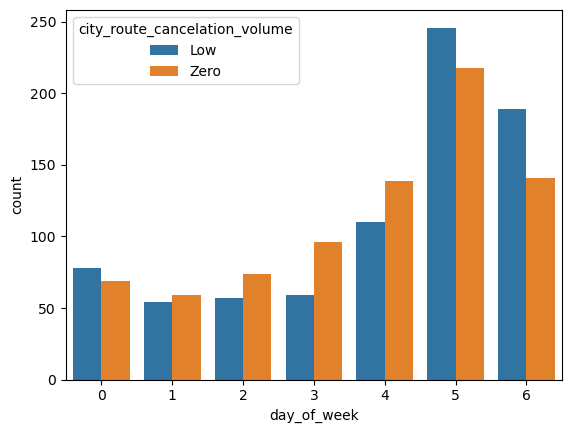

In [50]:
sns.countplot(x='day_of_week',hue='city_route_cancelation_volume',data=df_ttid_1)

<Axes: xlabel='day_of_week', ylabel='count'>

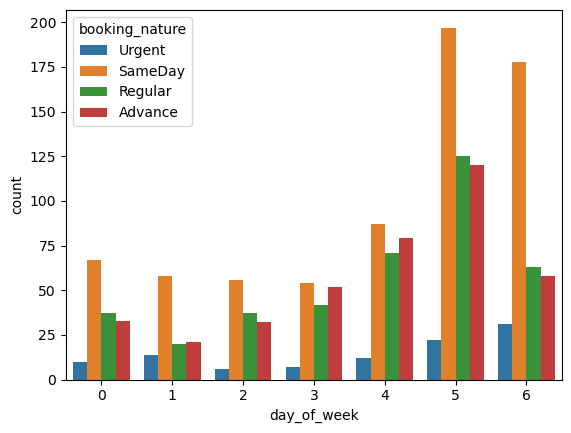

In [51]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_ttid_1)

<Axes: xlabel='booking_nature', ylabel='count'>

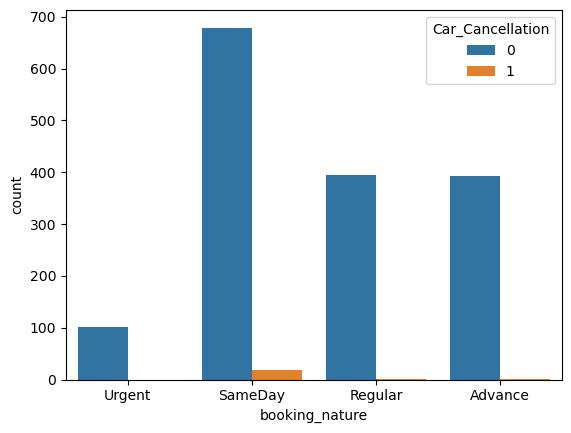

In [52]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_ttid_1)

> Similarly other cols can be analysed

## Label Encoding

In [53]:
df_ttid_1.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,6,1,0,1,0,0


In [54]:
df_ttid_1.from_area_id_cancelation_volume = df_ttid_1.from_area_id_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_ttid_1.city_route_cancelation_volume = df_ttid_1.city_route_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_ttid_1.booking_nature = df_ttid_1.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_ttid_1.time_of_day = df_ttid_1.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_ttid_1.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
6,2,2,1,1,1,1,1,0,0,0
17,1,2,4,1,5,1,0,1,0,0
24,1,2,4,1,5,1,0,0,0,0
158,1,1,3,1,4,1,0,1,0,0
216,1,2,4,1,6,1,0,1,0,0


# Machine Learning

In [55]:
# Features and Target

X = df_ttid_1.drop('Car_Cancellation',axis=1)
Y = df_ttid_1['Car_Cancellation']

In [56]:
X.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
6,2,2,1,1,1,1,1,0,0
17,1,2,4,1,5,1,0,1,0
24,1,2,4,1,5,1,0,0,0
158,1,1,3,1,4,1,0,1,0
216,1,2,4,1,6,1,0,1,0


In [57]:
Y.head()

6      0
17     0
24     0
158    0
216    0
Name: Car_Cancellation, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [60]:
xtrain.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
36413,2,2,3,1,6,10,0,0,0
4749,2,1,4,4,3,2,1,1,0
20605,2,2,2,3,0,7,1,1,0
16612,1,1,3,3,1,6,1,0,0
21786,1,1,2,3,0,7,1,0,0


In [61]:
ytrain.head()

36413    0
4749     0
20605    0
16612    0
21786    0
Name: Car_Cancellation, dtype: int64

In [62]:
xtest.head()

,from_area_id_cancelation_volume,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
39267,2,2,3,2,4,10,1,1,0
14961,1,1,4,1,5,6,0,1,0
30408,1,2,3,3,4,8,1,0,0
2033,1,2,4,4,4,2,0,0,0
27815,2,2,3,1,3,8,0,1,0


In [63]:
ytest.head()

39267    0
14961    0
30408    0
2033     0
27815    0
Name: Car_Cancellation, dtype: int64

## Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt_model = DecisionTreeClassifier()

In [66]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [67]:
ytrainpred = dt_model.predict(xtrain)
ytestpred = dt_model.predict(xtest)

In [68]:
from sklearn import metrics

In [69]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      0.65      0.79        17

    accuracy                           1.00      1271
   macro avg       1.00      0.82      0.89      1271
weighted avg       1.00      1.00      0.99      1271



In [70]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       314
           1       0.20      0.25      0.22         4

    accuracy                           0.98       318
   macro avg       0.60      0.62      0.61       318
weighted avg       0.98      0.98      0.98       318



## Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb_model = GaussianNB()

In [73]:
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [74]:
ytrainpred = nb_model.predict(xtrain)
ytestpred = nb_model.predict(xtest)

In [75]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1254
           1       0.06      1.00      0.12        17

    accuracy                           0.80      1271
   macro avg       0.53      0.90      0.51      1271
weighted avg       0.99      0.80      0.88      1271



In [76]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       314
           1       0.05      0.75      0.09         4

    accuracy                           0.80       318
   macro avg       0.52      0.77      0.49       318
weighted avg       0.98      0.80      0.88       318



## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_model = RandomForestClassifier()

In [79]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [80]:
ytrainpred = rf_model.predict(xtrain)
ytestpred = rf_model.predict(xtest)

In [81]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      0.65      0.79        17

    accuracy                           1.00      1271
   macro avg       1.00      0.82      0.89      1271
weighted avg       1.00      1.00      0.99      1271



In [82]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       1.00      0.25      0.40         4

    accuracy                           0.99       318
   macro avg       1.00      0.62      0.70       318
weighted avg       0.99      0.99      0.99       318



## For dataset where travel_type_id == 1, we can choose to deploy the Decision Tree Model, since it is giving same results and less complex to store, understand and interpret

#

## Preprocessing data where travel_type_id == 2

In [83]:
df_ttid_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [84]:
df_ttid_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       34292 non-null  int64  
 1   package_id           0 non-null      float64
 2   from_area_id         34292 non-null  float64
 3   to_area_id           34292 non-null  float64
 4   from_city_id         14504 non-null  float64
 5   to_city_id           0 non-null      float64
 6   from_date            34292 non-null  object 
 7   online_booking       34292 non-null  int64  
 8   mobile_site_booking  34292 non-null  int64  
 9   booking_created      34292 non-null  object 
 10  from_lat             34292 non-null  float64
 11  from_long            34292 non-null  float64
 12  to_lat               34292 non-null  float64
 13  to_long              34292 non-null  float64
 14  Car_Cancellation     34292 non-null  int64  
 15  is_VMID_12           34292 non-null  int3

In [85]:
df_ttid_2 = df_ttid_2.drop(['travel_type_id','package_id','from_city_id','to_city_id'],axis=1)
df_ttid_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


## Missing Value Treatment

In [86]:
df_ttid_2.isnull().sum()  # missing values

from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

## from_area_id, to_area_id

In [87]:
df_ttid_2.from_area_id = df_ttid_2.from_area_id.astype('int')
df_ttid_2.to_area_id = df_ttid_2.to_area_id.astype('int')
df_ttid_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [88]:
# Creating routes
df_ttid_2['area_route'] = df_ttid_2.from_area_id.astype('str') + ' -> ' + df_ttid_2.to_area_id.astype('str')
df_ttid_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,83 -> 448
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,1010 -> 540
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,1301 -> 1034
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,768 -> 398
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,1365 -> 849


In [89]:
area_route_cancelation_perc = df_ttid_2[['area_route','Car_Cancellation']].groupby('area_route').mean()['Car_Cancellation']
df_ttid_2['area_route_cancelation_perc'] = df_ttid_2.area_route.map(area_route_cancelation_perc)
df_ttid_2['area_route_cancelation_volume'] = np.where(df_ttid_2.area_route_cancelation_perc >= 0.67, 'High',
                                                     np.where(df_ttid_2.area_route_cancelation_perc == 0.0, 'Zero',
                                                     np.where(df_ttid_2.area_route_cancelation_perc <= 0.34, 'Low',
                                                     'Medium'
                                                    )))
df_ttid_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route,area_route_cancelation_perc,area_route_cancelation_volume
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,83 -> 448,0.0,Zero
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,1010 -> 540,0.0,Zero
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,1301 -> 1034,0.0,Zero
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,768 -> 398,0.0,Zero
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,1365 -> 849,0.0,Zero


In [90]:
df_ttid_2 = df_ttid_2.drop(['from_area_id','to_area_id','area_route','area_route_cancelation_perc'],axis=1)
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume
0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,Zero
1,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,Zero
2,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,Zero
3,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,Zero
4,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,Zero


## from_date, booking_created

In [91]:
df_ttid_2['from_date'] = pd.to_datetime(df_ttid_2['from_date'],format='mixed')
df_ttid_2['booking_created'] = pd.to_datetime(df_ttid_2['booking_created'],format='mixed')

In [92]:
df_ttid_2['month'] = df_ttid_2.from_date.dt.month
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1


In [93]:
df_ttid_2['day_of_week'] = df_ttid_2.from_date.dt.dayofweek  # Monday is 0 and Sunday is 6
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1


In [94]:
df_ttid_2['is_weekend'] = (df_ttid_2['day_of_week'] >=5).astype('int')
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0


In [95]:
df_ttid_2['hour_of_day'] = df_ttid_2.from_date.dt.hour 
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9


In [96]:
df_ttid_2['time_of_day'] = pd.cut(df_ttid_2['hour_of_day'], bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning


In [97]:
df_ttid_2['time_diff'] = (df_ttid_2.from_date - df_ttid_2.booking_created).dt.total_seconds()/3600
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night,0.350000
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning,6.583333
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night,0.366667
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night,1.100000
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning,1.116667


In [98]:
df_ttid_2['time_diff'].describe()

count    34292.000000
mean        37.202130
std        100.917727
min        -22.900000
25%          3.183333
50%          8.833333
75%         19.166667
max       1906.900000
Name: time_diff, dtype: float64

In [99]:
df_ttid_2['booking_nature'] = pd.cut(df_ttid_2['time_diff'], bins=[-23,3.2,9,20,1910],labels=['Urgent','SameDay','Regular','Advance'])
df_ttid_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night,0.350000,Urgent
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning,6.583333,SameDay
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night,0.366667,Urgent
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night,1.100000,Urgent
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning,1.116667,Urgent


In [100]:
df_ttid_2 = df_ttid_2.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_ttid_2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,Night,Urgent
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,Morning,SameDay
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,Night,Urgent
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,Night,Urgent
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,Morning,Urgent


## from_lat, from_long, to_lat, to_long

In [101]:
!pip install geopy

In [102]:
from geopy.distance import geodesic

In [103]:
def calc_distance(row):
    from_cord = (row['from_lat'],row['from_long'])  #pickup point
    to_cord = (row['to_lat'],row['to_long'])  # drop point
    return geodesic(from_cord,to_cord).kilometers

In [104]:
df_ttid_2.apply(calc_distance,axis=1)  # axis = 1 means apply the fun rowise, axis=0 apply the func colwise

0         3.980687
1        14.004432
2        12.648909
3         9.534596
4        14.655467
           ...    
43425    12.180435
43426    10.681284
43427    21.251031
43429     4.584142
43430    25.432381
Length: 34292, dtype: float64

In [105]:
df_ttid_2['distance'] = df_ttid_2.apply(calc_distance,axis=1)
df_ttid_2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature,distance
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,Night,Urgent,3.980687
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,Morning,SameDay,14.004432
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,Night,Urgent,12.648909
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,Night,Urgent,9.534596
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,Morning,Urgent,14.655467


In [106]:
df_ttid_2 = df_ttid_2.drop(['from_lat','from_long','to_lat','to_long'],axis=1)
df_ttid_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature,distance
0,0,0,0,0,Zero,1,1,0,Night,Urgent,3.980687
1,0,0,0,1,Zero,1,1,0,Morning,SameDay,14.004432
2,0,0,0,1,Zero,1,1,0,Night,Urgent,12.648909
3,0,0,0,1,Zero,1,1,0,Night,Urgent,9.534596
4,0,0,0,1,Zero,1,1,0,Morning,Urgent,14.655467


## Re-arranging the cols

In [107]:
df_ttid_2 = df_ttid_2[['area_route_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','mobile_site_booking','distance','Car_Cancellation']]
df_ttid_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,Zero,Urgent,Night,0,1,1,0,0,0,3.980687,0
1,Zero,SameDay,Morning,0,1,1,1,0,0,14.004432,0
2,Zero,Urgent,Night,0,1,1,1,0,0,12.648909,0
3,Zero,Urgent,Night,0,1,1,1,0,0,9.534596,0
4,Zero,Urgent,Morning,0,1,1,1,0,0,14.655467,0


## EDA

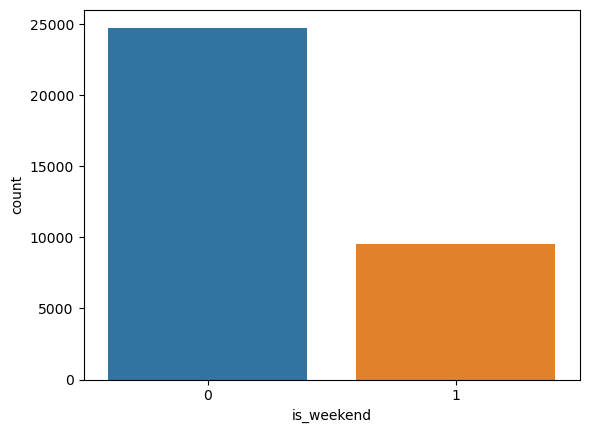

In [108]:
sns.countplot(x='is_weekend',data=df_ttid_2)  # booking volume on a weekday and weekend
plt.show()

<Axes: xlabel='is_weekend', ylabel='count'>

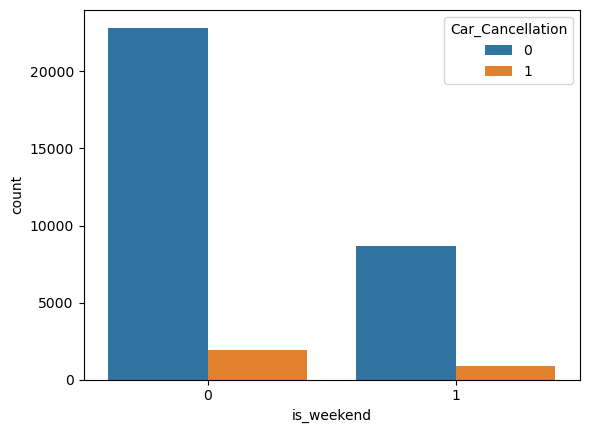

In [109]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_ttid_2)

<Axes: xlabel='day_of_week', ylabel='count'>

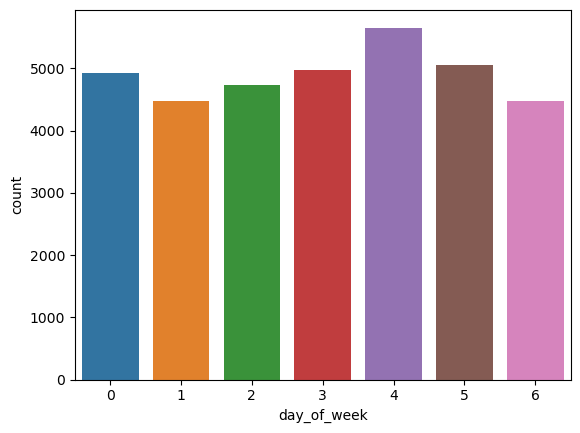

In [110]:
sns.countplot(x='day_of_week',data=df_ttid_2)  # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

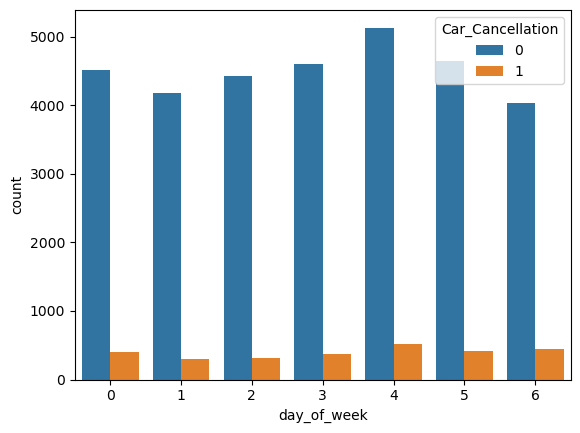

In [111]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_ttid_2)

<Axes: xlabel='day_of_week', ylabel='count'>

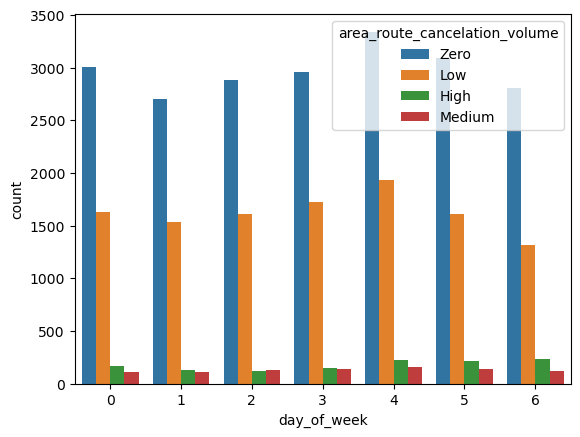

In [112]:
sns.countplot(x='day_of_week',hue='area_route_cancelation_volume',data=df_ttid_2)

<Axes: xlabel='day_of_week', ylabel='count'>

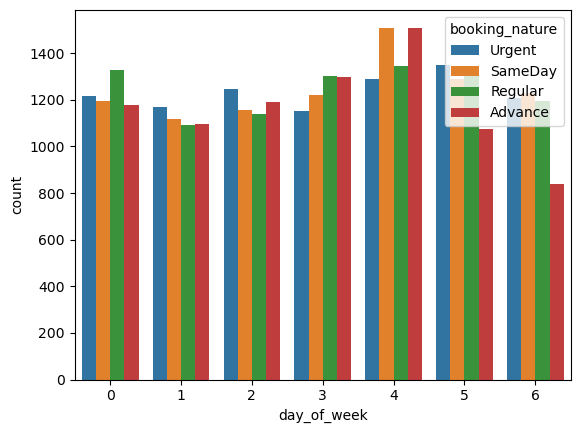

In [113]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_ttid_2)

<Axes: xlabel='booking_nature', ylabel='count'>

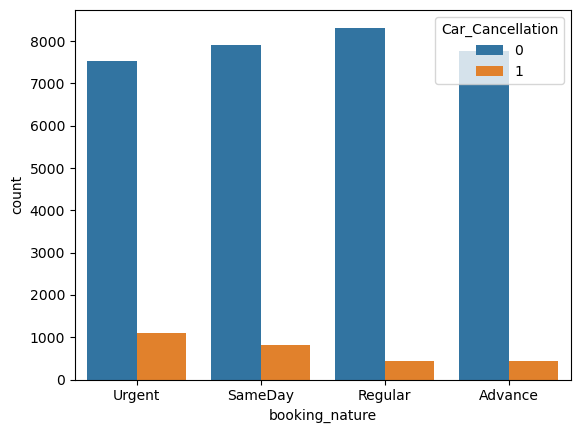

In [114]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_ttid_2)

> Similarly other cols can be analysed

## Label Encoding

In [115]:
df_ttid_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,Zero,Urgent,Night,0,1,1,0,0,0,3.980687,0
1,Zero,SameDay,Morning,0,1,1,1,0,0,14.004432,0
2,Zero,Urgent,Night,0,1,1,1,0,0,12.648909,0
3,Zero,Urgent,Night,0,1,1,1,0,0,9.534596,0
4,Zero,Urgent,Morning,0,1,1,1,0,0,14.655467,0


In [116]:
df_ttid_2.area_route_cancelation_volume = df_ttid_2.area_route_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_ttid_2.booking_nature = df_ttid_2.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_ttid_2.time_of_day = df_ttid_2.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_ttid_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,1,1,4,0,1,1,0,0,0,3.980687,0
1,1,2,1,0,1,1,1,0,0,14.004432,0
2,1,1,4,0,1,1,1,0,0,12.648909,0
3,1,1,4,0,1,1,1,0,0,9.534596,0
4,1,1,1,0,1,1,1,0,0,14.655467,0


# Machine Learning

In [117]:
# Features and Target

X = df_ttid_2.drop('Car_Cancellation',axis=1)
Y = df_ttid_2['Car_Cancellation']

In [118]:
X.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
0,1,1,4,0,1,1,0,0,0,3.980687
1,1,2,1,0,1,1,1,0,0,14.004432
2,1,1,4,0,1,1,1,0,0,12.648909
3,1,1,4,0,1,1,1,0,0,9.534596
4,1,1,1,0,1,1,1,0,0,14.655467


In [119]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [121]:
xtrain.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
2146,1,2,2,0,3,1,1,0,0,10.704609
22156,4,3,1,0,3,7,1,0,0,7.077682
31560,1,3,2,0,2,9,0,0,1,35.036706
34226,2,2,3,0,4,9,0,0,0,23.055906
17439,1,3,1,1,6,6,1,0,0,11.507213


In [122]:
ytrain.head()

2146     0
22156    1
31560    0
34226    1
17439    0
Name: Car_Cancellation, dtype: int64

In [123]:
xtest.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
32354,2,1,4,1,6,9,1,0,0,8.893665
7282,2,3,1,0,0,3,1,1,0,12.894232
40204,3,1,3,0,2,10,0,1,0,2.225418
20213,3,2,3,0,4,6,0,1,0,13.473931
927,2,2,2,1,5,1,0,0,0,8.712988


In [124]:
ytest.head()

32354    0
7282     0
40204    0
20213    0
927      0
Name: Car_Cancellation, dtype: int64

## Decision Tree Model

In [125]:
dt_model = DecisionTreeClassifier()

In [126]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [127]:
ytrainpred = dt_model.predict(xtrain)
ytestpred = dt_model.predict(xtest)

In [128]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25202
           1       0.99      0.97      0.98      2231

    accuracy                           1.00     27433
   macro avg       0.99      0.98      0.99     27433
weighted avg       1.00      1.00      1.00     27433



In [129]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6315
           1       0.63      0.67      0.65       544

    accuracy                           0.94      6859
   macro avg       0.80      0.82      0.81      6859
weighted avg       0.94      0.94      0.94      6859



## Naive Bayes Classifier

In [130]:
nb_model = GaussianNB()

In [131]:
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [132]:
ytrainpred = nb_model.predict(xtrain)
ytestpred = nb_model.predict(xtest)

In [133]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     25202
           1       0.58      0.63      0.60      2231

    accuracy                           0.93     27433
   macro avg       0.77      0.79      0.78     27433
weighted avg       0.94      0.93      0.93     27433



In [134]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6315
           1       0.57      0.65      0.61       544

    accuracy                           0.93      6859
   macro avg       0.77      0.80      0.79      6859
weighted avg       0.94      0.93      0.94      6859



## Random Forest

In [135]:
rf_model = RandomForestClassifier()

In [136]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [137]:
ytrainpred = rf_model.predict(xtrain)
ytestpred = rf_model.predict(xtest)

In [138]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25202
           1       0.98      0.98      0.98      2231

    accuracy                           1.00     27433
   macro avg       0.99      0.99      0.99     27433
weighted avg       1.00      1.00      1.00     27433



In [139]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6315
           1       0.78      0.65      0.71       544

    accuracy                           0.96      6859
   macro avg       0.88      0.82      0.84      6859
weighted avg       0.96      0.96      0.96      6859



## For dataset where travel_type_id == 2, we can choose to deploy the Random Forest Model, since it is giving best results

#

In [140]:
## Preprocessing data where travel_type_id == 1

In [141]:
df_ttid_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       7550 non-null   int64  
 1   package_id           7550 non-null   float64
 2   from_area_id         7550 non-null   float64
 3   to_area_id           0 non-null      float64
 4   from_city_id         448 non-null    float64
 5   to_city_id           0 non-null      float64
 6   from_date            7550 non-null   object 
 7   online_booking       7550 non-null   int64  
 8   mobile_site_booking  7550 non-null   int64  
 9   booking_created      7550 non-null   object 
 10  from_lat             7550 non-null   float64
 11  from_long            7550 non-null   float64
 12  to_lat               0 non-null      float64
 13  to_long              0 non-null      float64
 14  Car_Cancellation     7550 non-null   int64  
 15  is_VMID_12           7550 non-null   int32

In [142]:
df_ttid_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


In [143]:
df_ttid_3 = df_ttid_3.drop(['travel_type_id','to_area_id','from_city_id','to_city_id','from_lat','from_long','to_lat','to_long'],axis=1)
df_ttid_3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1


## Missing Value Treatment

In [144]:
df_ttid_3.isnull().sum()  # missing values

package_id             0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

## from_area_id

In [145]:
# Calculating the cancellation perc for each area
from_area_id_cancelation_perc = df_ttid_3[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
df_ttid_3['from_area_id_cancelation_perc'] = df_ttid_3.from_area_id.map(from_area_id_cancelation_perc)
df_ttid_3['from_area_id_cancelation_volume'] = np.where(df_ttid_3.from_area_id_cancelation_perc >= 0.67, 'High',
                                                     np.where(df_ttid_3.from_area_id_cancelation_perc == 0.0, 'Zero',
                                                     np.where(df_ttid_3.from_area_id_cancelation_perc <= 0.34, 'Low',
                                                     'Medium'
                                                    )))
df_ttid_3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_perc,from_area_id_cancelation_volume
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,0.108696,Low
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,0.111111,Low
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,0.040000,Low
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,0.115385,Low
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,0.054545,Low


In [146]:
df_ttid_3 = df_ttid_3.drop(['from_area_id_cancelation_perc','from_area_id'],axis=1)
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume
8,2.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,Low
20,2.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,Low
23,1.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,Low
34,1.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,Low
47,2.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,Low


## from_date, booking_created

In [147]:
df_ttid_3['from_date'] = pd.to_datetime(df_ttid_3['from_date'],format='mixed')
df_ttid_3['booking_created'] = pd.to_datetime(df_ttid_3['booking_created'],format='mixed')

In [148]:
df_ttid_3['month'] = df_ttid_3.from_date.dt.month
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1


In [149]:
df_ttid_3['day_of_week'] = df_ttid_3.from_date.dt.dayofweek  # Monday is 0 and Sunday is 6
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2


In [150]:
df_ttid_3['is_weekend'] = (df_ttid_3['day_of_week'] >=5).astype('int')
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0


In [151]:
df_ttid_3['hour_of_day'] = df_ttid_3.from_date.dt.hour 
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3


In [152]:
df_ttid_3['time_of_day'] = pd.cut(df_ttid_3['hour_of_day'], bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night


In [153]:
df_ttid_3['time_diff'] = (df_ttid_3.from_date - df_ttid_3.booking_created).dt.total_seconds()/3600
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon,6.266667
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon,1.633333
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon,1.850000
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening,2.583333
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night,7.383333


In [154]:
df_ttid_3['time_diff'].describe()

count    7550.000000
mean       14.570344
std        39.198073
min        -3.550000
25%         1.920833
50%         5.858333
75%        13.766667
max       695.550000
Name: time_diff, dtype: float64

In [155]:
df_ttid_3['booking_nature'] = pd.cut(df_ttid_3['time_diff'], bins=[-4,2,6,13,700],labels=['Urgent','SameDay','Regular','Advance'])
df_ttid_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon,6.266667,Regular
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon,1.633333,Urgent
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon,1.850000,Urgent
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening,2.583333,SameDay
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night,7.383333,Regular


In [156]:
df_ttid_3 = df_ttid_3.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_ttid_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
8,2.0,0,0,0,0,Low,1,1,0,Afternoon,Regular
20,2.0,0,0,0,0,Low,1,1,0,Afternoon,Urgent
23,1.0,0,0,0,1,Low,1,1,0,Afternoon,Urgent
34,1.0,1,0,0,1,Low,1,1,0,Evening,SameDay
47,2.0,0,0,0,1,Low,1,2,0,Night,Regular


## Re-arranging the cols

In [157]:
df_ttid_3 = df_ttid_3[['from_area_id_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','mobile_site_booking','Car_Cancellation']]
df_ttid_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,Low,Regular,Afternoon,0,1,1,0,0,0,0
20,Low,Urgent,Afternoon,0,1,1,0,0,0,0
23,Low,Urgent,Afternoon,0,1,1,1,0,0,0
34,Low,SameDay,Evening,0,1,1,1,1,0,0
47,Low,Regular,Night,0,2,1,1,0,0,0


## EDA

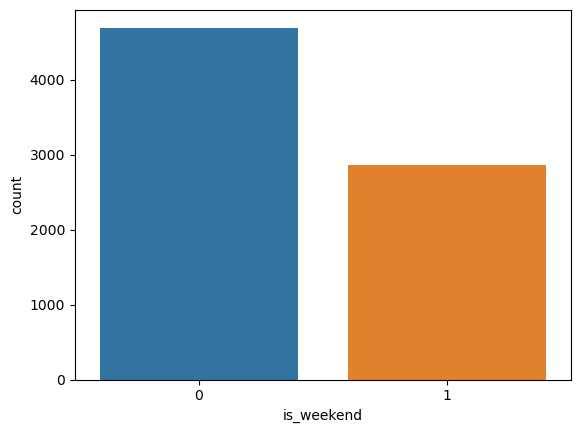

In [158]:
sns.countplot(x='is_weekend',data=df_ttid_3)  # booking volume on a weekday and weekend
plt.show()

<Axes: xlabel='is_weekend', ylabel='count'>

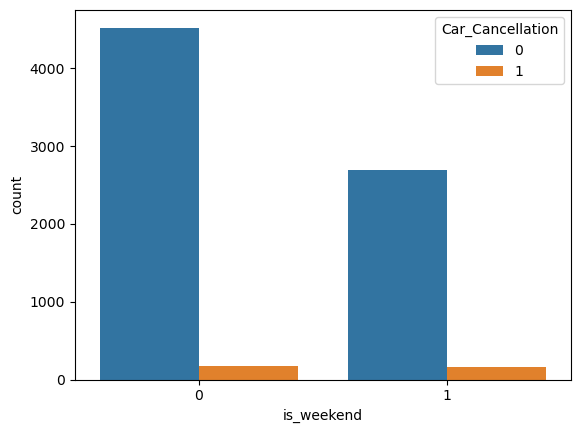

In [159]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_ttid_3)

<Axes: xlabel='day_of_week', ylabel='count'>

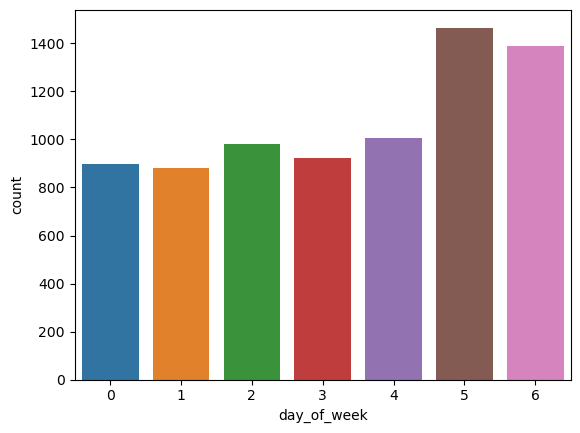

In [160]:
sns.countplot(x='day_of_week',data=df_ttid_3)  # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

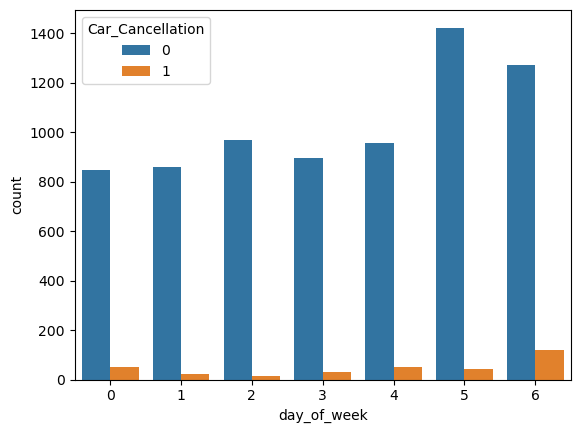

In [161]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_ttid_3)

<Axes: xlabel='day_of_week', ylabel='count'>

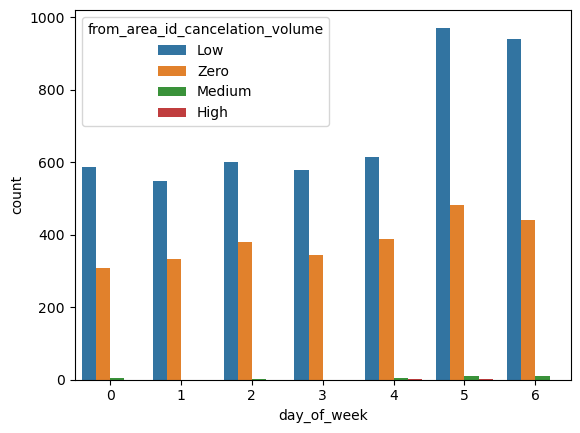

In [162]:
sns.countplot(x='day_of_week',hue='from_area_id_cancelation_volume',data=df_ttid_3)

<Axes: xlabel='day_of_week', ylabel='count'>

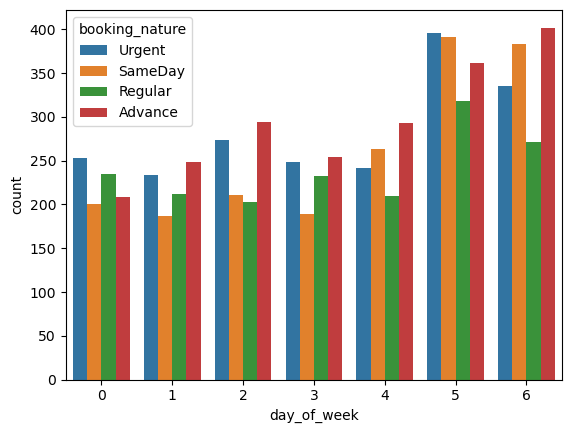

In [163]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_ttid_3)

<Axes: xlabel='booking_nature', ylabel='count'>

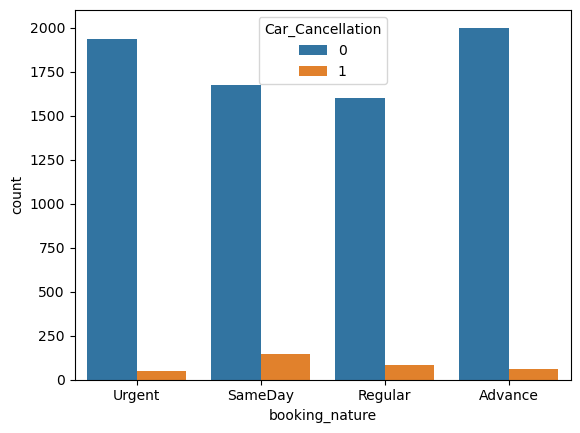

In [164]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_ttid_3)

> Similarly other cols can be analysed

## Label Encoding

In [165]:
df_ttid_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,Low,Regular,Afternoon,0,1,1,0,0,0,0
20,Low,Urgent,Afternoon,0,1,1,0,0,0,0
23,Low,Urgent,Afternoon,0,1,1,1,0,0,0
34,Low,SameDay,Evening,0,1,1,1,1,0,0
47,Low,Regular,Night,0,2,1,1,0,0,0


In [166]:
df_ttid_3.from_area_id_cancelation_volume = df_ttid_3.from_area_id_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_ttid_3.booking_nature = df_ttid_3.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_ttid_3.time_of_day = df_ttid_3.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_ttid_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,2,3,2,0,1,1,0,0,0,0
20,2,1,2,0,1,1,0,0,0,0
23,2,1,2,0,1,1,1,0,0,0
34,2,2,3,0,1,1,1,1,0,0
47,2,3,4,0,2,1,1,0,0,0


# Machine Learning

In [167]:
# Features and Target

X = df_ttid_3.drop('Car_Cancellation',axis=1)
Y = df_ttid_3['Car_Cancellation']

In [168]:
X.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
8,2,3,2,0,1,1,0,0,0
20,2,1,2,0,1,1,0,0,0
23,2,1,2,0,1,1,1,0,0
34,2,2,3,0,1,1,1,1,0
47,2,3,4,0,2,1,1,0,0


In [169]:
Y.head()

8     0
20    0
23    0
34    0
47    0
Name: Car_Cancellation, dtype: int64

In [170]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [171]:
xtrain.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
26758,2,3,1,0,3,8,1,0,0
12461,2,1,1,0,0,5,1,0,0
42276,1,3,3,0,3,11,0,0,0
15232,1,3,1,1,6,5,0,1,0
9118,2,1,2,1,5,4,1,0,1


In [172]:
ytrain.head()

26758    0
12461    0
42276    0
15232    0
9118     0
Name: Car_Cancellation, dtype: int64

In [173]:
xtest.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
38009,2,2,2,0,1,10,1,1,0
14680,1,4,4,0,3,5,1,0,0
10560,2,3,3,1,5,4,0,0,0
38399,1,4,3,1,5,10,0,0,0
39391,2,2,2,0,4,10,1,0,0


In [174]:
ytest.head()

38009    1
14680    0
10560    0
38399    0
39391    1
Name: Car_Cancellation, dtype: int64

## Decision Tree Model

In [175]:
dt_model = DecisionTreeClassifier()

In [176]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [177]:
ytrainpred = dt_model.predict(xtrain)
ytestpred = dt_model.predict(xtest)

In [178]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5776
           1       0.85      0.50      0.63       264

    accuracy                           0.97      6040
   macro avg       0.91      0.75      0.81      6040
weighted avg       0.97      0.97      0.97      6040



In [179]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1438
           1       0.49      0.36      0.42        72

    accuracy                           0.95      1510
   macro avg       0.73      0.67      0.70      1510
weighted avg       0.95      0.95      0.95      1510



## Naive Bayes Classifier

In [180]:
nb_model = GaussianNB()

In [181]:
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [182]:
ytrainpred = nb_model.predict(xtrain)
ytestpred = nb_model.predict(xtest)

In [183]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5776
           1       0.10      0.05      0.07       264

    accuracy                           0.94      6040
   macro avg       0.53      0.52      0.52      6040
weighted avg       0.92      0.94      0.93      6040



In [184]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1438
           1       0.14      0.07      0.09        72

    accuracy                           0.94      1510
   macro avg       0.55      0.52      0.53      1510
weighted avg       0.92      0.94      0.92      1510



## Random Forest

In [185]:
rf_model = RandomForestClassifier()

In [186]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [187]:
ytrainpred = rf_model.predict(xtrain)
ytestpred = rf_model.predict(xtest)

In [188]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5776
           1       0.76      0.60      0.67       264

    accuracy                           0.97      6040
   macro avg       0.87      0.79      0.83      6040
weighted avg       0.97      0.97      0.97      6040



In [189]:
print(metrics.classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1438
           1       0.47      0.26      0.34        72

    accuracy                           0.95      1510
   macro avg       0.72      0.62      0.66      1510
weighted avg       0.94      0.95      0.94      1510



## For dataset where travel_type_id == 3, we can choose to deploy the Random Forest Model, since it is giving best results